In [1]:
import pandas as pd,seaborn as sns, numpy as np, matplotlib.pyplot as plt # for data preprocessing and visualization

In [2]:
df = pd.read_csv('playstore-analysis.csv') # load train data frame in pandas 

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
 df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## droping null value rows respected to  rating column

## Q1.a

In [5]:
df =df.dropna(subset=[ 'Rating'])

# `Q1b

In [6]:
null_columns=df.columns[df.isnull().any()]

In [7]:
df[df["Android Ver"].isnull()][null_columns]

,Content Rating,Current Ver,Android Ver
4453,Everyone,4.4,NaN
4490,Everyone,1.1,NaN
10472,NaN,4.0 and up,NaN


In [8]:
df = df.drop([10472],axis = 0)

In [9]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [10]:
 df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

# Q1.c 

In [11]:
df['Current Ver'] = df['Current Ver'].fillna( df['Current Ver'].value_counts()[:1].index.tolist()[0])

In [12]:
 df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#  checking unidue valuse to get numeric valuse

In [13]:
df.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [14]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [16]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].dtype


dtype('float64')

In [17]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [18]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [19]:
df.Size.unique()

array([1.90000000e+04, 1.40000000e+04, 8.70000000e+03, 2.50000000e+04,
       2.80000000e+03, 5.60000000e+03, 2.90000000e+04, 3.30000000e+04,
       3.10000000e+03, 2.80000000e+04, 1.20000000e+04, 2.00000000e+04,
       2.10000000e+04, 3.70000000e+04, 2.70000000e+03, 5.50000000e+03,
       1.70000000e+04, 3.90000000e+04, 3.10000000e+04, 4.20000000e+03,
       2.30000000e+04, 6.00000000e+03, 6.10000000e+03, 4.60000000e+03,
       9.20000000e+03, 5.20000000e+03, 1.10000000e+04, 2.40000000e+04,
       2.15165295e+04, 9.40000000e+03, 1.50000000e+04, 1.00000000e+04,
       1.20000000e+03, 2.60000000e+04, 8.00000000e+03, 7.90000000e+03,
       5.60000000e+04, 5.70000000e+04, 3.50000000e+04, 5.40000000e+04,
       2.01000000e+02, 3.60000000e+03, 5.70000000e+03, 8.60000000e+03,
       2.40000000e+03, 2.70000000e+04, 2.50000000e+03, 7.00000000e+03,
       1.60000000e+04, 3.40000000e+03, 8.90000000e+03, 3.90000000e+03,
       2.90000000e+03, 3.80000000e+04, 3.20000000e+04, 5.40000000e+03,
      

In [20]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(int)
df['Size'].dtype

dtype('int32')

In [21]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
df['Installs'] = df['Installs'].str.replace(',' ,"")
df['Installs'] = df['Installs'].str.replace('+',"")
df['Installs'] = df['Installs'].replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(int)
df['Installs'].dtype

dtype('int32')

In [23]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [24]:
df.Price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [25]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

dtype('float64')

In [26]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [27]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [28]:
df['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [29]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [30]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Q3

In [32]:
df.Rating[df['Rating'] <1 ].count()

0

In [33]:
df.Rating[df['Rating'] >5 ].count()

0

In [34]:
df.shape

(9366, 13)

In [35]:
df['sub'] = df['Installs'] -df['Reviews']

In [36]:
indexNames = df[ (df['sub'] >= 0 ) ].index
df.drop(indexNames)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,sub
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up,-3.0
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device,-249.0
5917,Ra Ga Ba,GAME,5.0,2.0,20000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up,-1.0
6700,Brick Breaker BR,GAME,5.0,7.0,19000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up,-2.0
7402,Trovami se ci riesci,GAME,5.0,11.0,6100,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up,-1.0
8591,DN Blog,SOCIAL,5.0,20.0,4200,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up,-10.0
10697,Mu.F.O.,GAME,5.0,2.0,16000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up,-1.0


In [37]:
df.drop([2454,4663,5917,6700,7402,8591,10697],axis = 0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,sub
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,9841.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,499033.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,4912490.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,49784356.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,99033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up,493.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up,4962.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up,96.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,21516,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,886.0


In [38]:
df = df.drop(['sub'],axis = 1)

# Q4

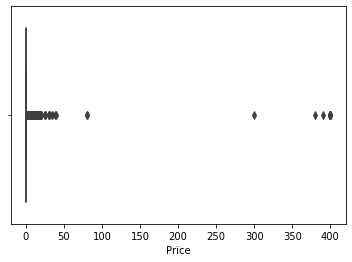

In [39]:
ax = sns.boxplot(x=df["Price"])


In [40]:
df[ (df['Price'] ==200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
lower_limit= df.loc[df['Price'] < 30]

In [42]:
df.clip(lower_limit,axis=1) ## clipping the price

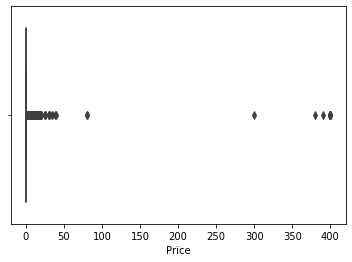

In [42]:
ax = sns.boxplot(x=df["Price"])


In [43]:
df[df['Reviews'] < 10000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [44]:
df['Installs'].quantile(.95)

100000000.0

In [45]:
x = np.quantile(df['Installs'],0.95)

In [46]:
df1 = df[df['Installs'] > x ]

In [47]:
pd.concat([df, df1, df1]).drop_duplicates(keep=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600,500,Free,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,21516,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


# Q5 

In [49]:
rating = df[df['Rating'] != 0 ]

In [50]:
rating.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.641149,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.045347,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


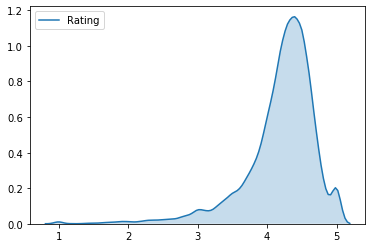

In [52]:
sns.kdeplot(shade=True,data=rating['Rating'])

In [53]:
df['Rating'].skew()

-1.8496951283704521

In [54]:
df['Rating'].kurt()

5.7869240668056

# Q6.a

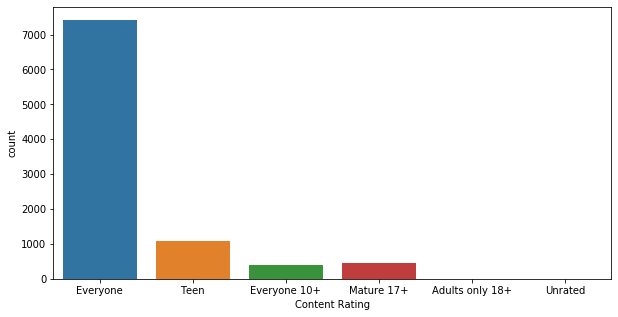

In [55]:
plt.figure(figsize=(10,5)) 
ax = sns.countplot(x="Content Rating", data=df)

In [57]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [58]:
df.index[df['Content Rating'] == 'Unrated'].values

array([8266], dtype=int64)

In [50]:
df = df.drop([8266],axis = 0)

In [59]:
df.index[df['Content Rating'] == 'Adults only 18+'].values

array([ 298, 3043, 6424], dtype=int64)

In [60]:
df = df.drop([298, 3043, 6424],axis = 0)

# Q7.a

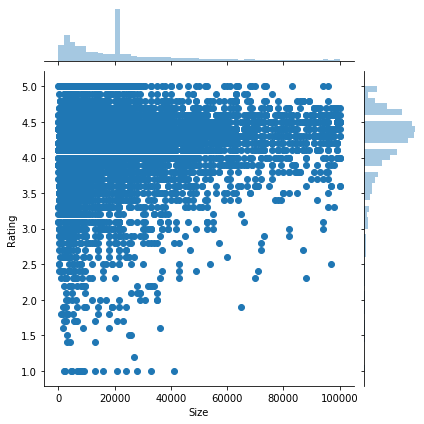

In [61]:
sns.jointplot(x="Size", y="Rating", data=df);

# Q7.b
## most of the apps are rated 4 or 5 stars

# Q7.c
## the size does not changes the rating

# Q.8.a  jointplot (with regression line)

In [62]:
df2 = df.loc[df['Price'] != 0]

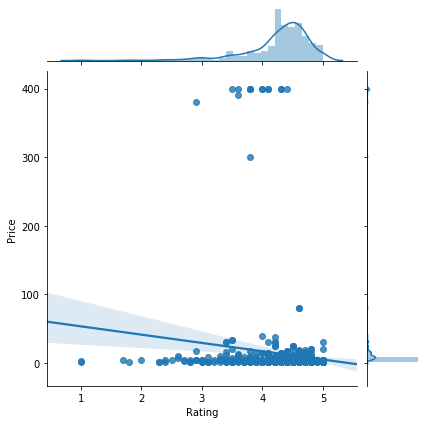

In [63]:
g = sns.jointplot( "Rating", "Price", data=df2, kind="reg")

#   Q.8.b
# in  the jointplot regression line is prity stret in it most of the price are >30

# Q.8.c

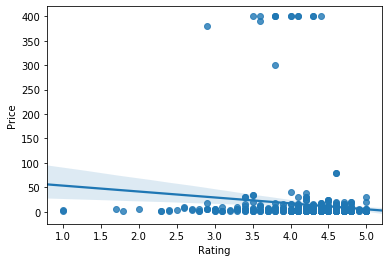

In [64]:
ax = sns.regplot(x ="Rating", y ="Price", data=df2)

# Q8.d

In [65]:
df2 = df.loc[df['Price'] != 0]

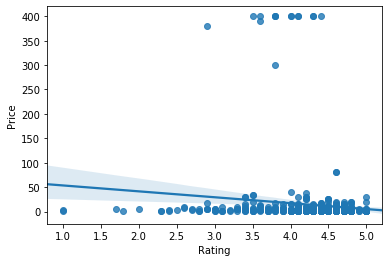

In [66]:
ax = sns.regplot(x ="Rating", y ="Price", data=df2)

# Q.8.e : the pettrn does chenge a littel

# Q.8.f: the rating doesn't becouse of price 

# Q9 Rating vs. content rating

In [67]:
df3 =  df[['Reviews', 'Size',  'Price', 'Rating']] 

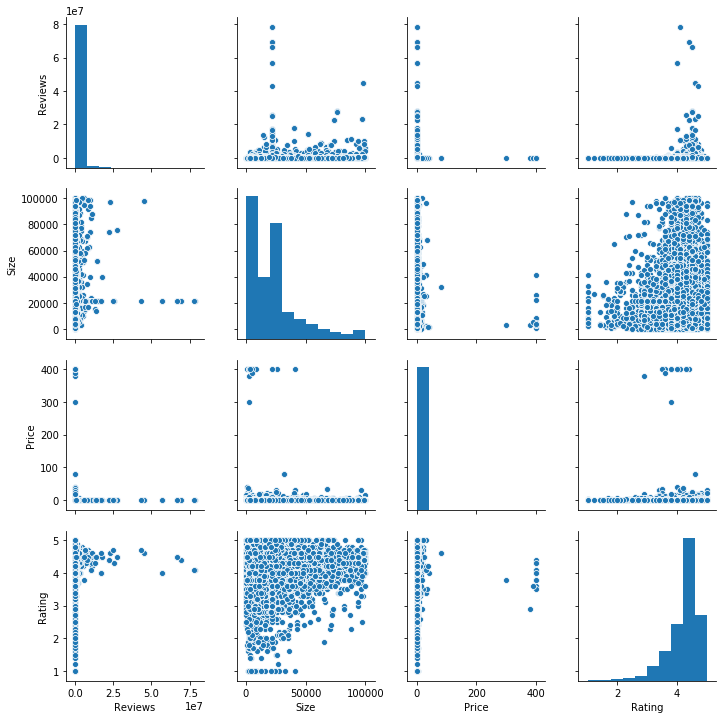

In [68]:
ax = sns.pairplot(data=df3)

# Q10.a

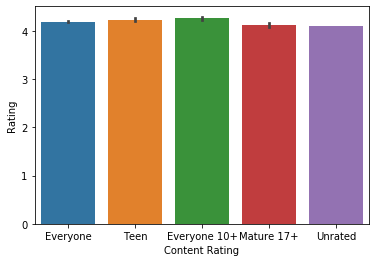

In [69]:
ax = sns.barplot(y ="Rating", x ="Content Rating", data=df)

In [70]:
df['Rating'].describe()

count    9363.000000
mean        4.191723
std         0.515258
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

 ## we should use the mean matric because is continuous

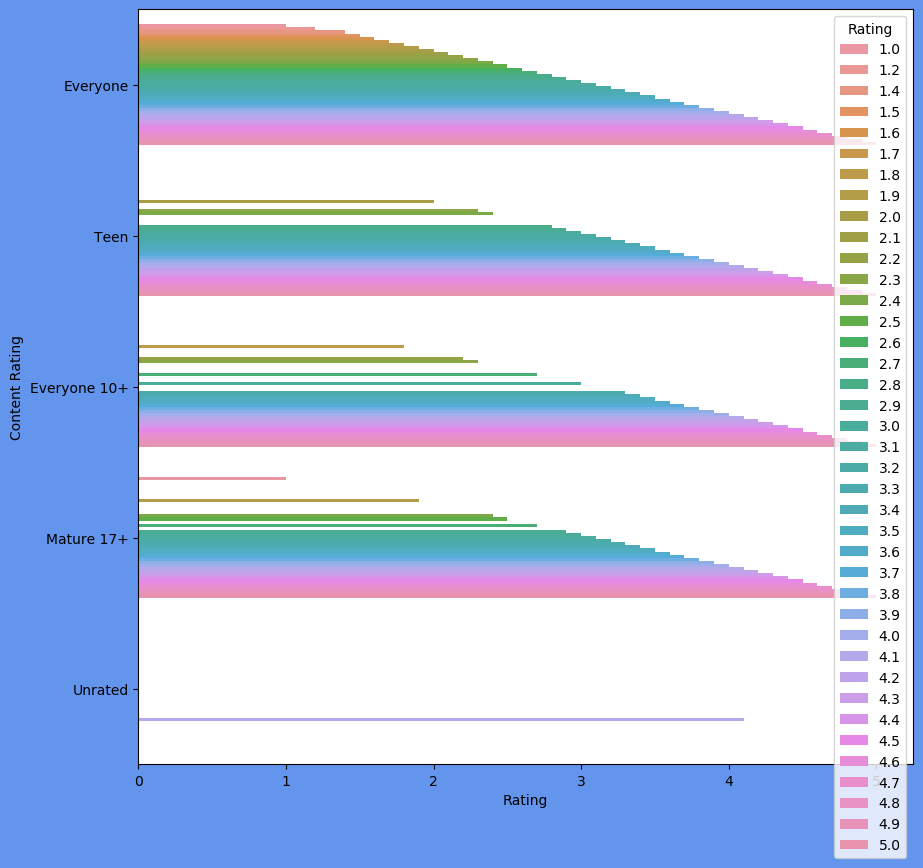

In [71]:
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='cornflowerblue', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='Rating', y='Content Rating', hue="Rating", data=df, estimator=np.mean)
plt.show()